# Lets try to solve titanic beginners level

Import all the required libraries

In [1]:
# to read the csv files
# to clean the data and perform pre-processing
import pandas as pd
# to explore the data visually(story telling)
import seaborn as sns
import matplotlib.pyplot as plt
# spliting test and train data
from sklearn.model_selection import train_test_split
# defining the models being used
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# validating the models prediction
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

lets read the data 

In [11]:
dataset = pd.read_csv('../dataset/train.csv')
dataset.head()
#print(dataset.columns)
#dataset.Parch.value_counts()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Points to ponder
<li> PassengerId is useless column, need to drop that.
<li> Survived is a binary variable with 0==not survived and 1==survived
<li> Pclass is factor variable with 3 outcome 1,2,3
<li> Name contains name and is USELESS, need to be dropped
<li> Sex is male/female
<li> Age could be considered ranges from 0.42 to 80 with mean as 29.69 some data might be wrong, need to analyze further
<li> SibSp is sibling/spouse, with range 0,1,2,3,4,5,8, majority population doesn't have one
<li> Parch still to be known
<li> Ticket USELESS
<li> Fare could be used 
<li> Cabin could be used, but there are very few non-null values(~200), droping the column would be better
<li> Embarked will be used 

## Data pre-processing, making it perfect for training purpose

In [12]:
# drop column PassengerId and Name
dataset.drop(['PassengerId','Name','Cabin'],inplace=True,axis=1)
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [13]:
dataset.describe()
import numpy as np
# Age have missing values, either we can drop rows or fill dummy.
# I am preferring filling of dummy which is mean(Age)
dataset_age = dataset
mean_age = dataset['Age'].mean()
dataset['Age'].fillna(mean_age,inplace=True)
dataset['Age'].head(n=20)

# 'Embarked' contains 2 null values, we are creating a category 'U' unknown
dataset['Embarked'].fillna('U', inplace=True)
dataset.isnull().sum()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## exploratory Analysis

In [15]:
# is there any relation between survival and Pclass,
# my bet is passenger of higher class would have benefitted. Lets see

# lets make contingency table
data_crosstab = pd.crosstab(dataset['Survived'],dataset['Pclass'], margins=True)
print(data_crosstab)

# well my bet was partially right but not that significat as survival rate of Pclass 3 is worst, but there were more person 
# in Pclass 3, so that's a failed attempt to malign authorities

## well well did they follow ladies first? we have seen it in the movie though !! worth a try
sex_crosstab = pd.crosstab(dataset['Survived'], dataset['Sex'], margins=True)
print(sex_crosstab)

# andddd answer is YESSS, out of 314 females, 233 survived woww, and out of 577 males, only 109 survived
# certainly there is a correlation, females were given priority over male counterparts


# what about Aged people?
aged = dataset[(dataset.Survived==1) & (dataset.Age<45)]
print(aged.shape[0])

# well it seems aged people were not able to make it


Pclass      1    2    3  All
Survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891
Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891
299


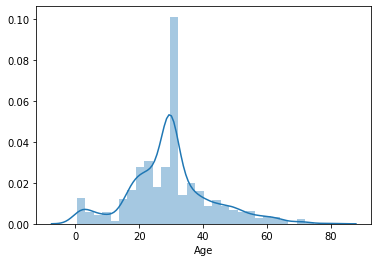

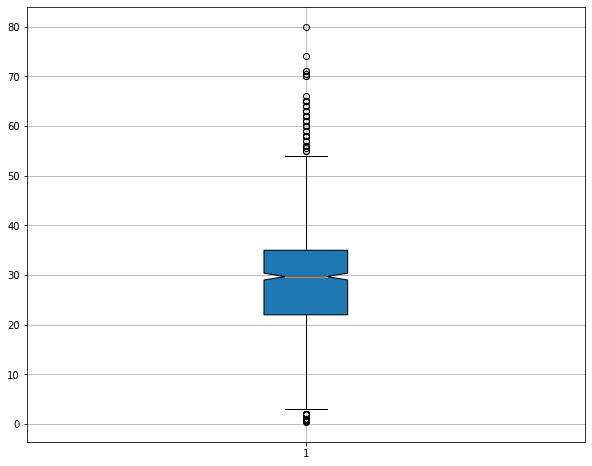

In [7]:
sns.distplot(dataset.Age)
plt.figure(figsize=(10,8))
plt.boxplot(dataset.Age, notch=True, patch_artist=True)
plt.grid()


plt.show()

Age is skewed positively, saying more young ones were there as compared to old ones. Seems no outliers and age range varies from 0 to 80, believable

## MODELLING

In [23]:
# we will use random forest classifier and logistic regression and then see the accuracy
features = ['Pclass','Sex','Age','Embarked']

# convert Sex,Embarked to integer

rfc_dataset = dataset[features]
rfc_dataset = pd.get_dummies(rfc_dataset)
y = dataset['Survived']
rfc_dataset.sample(10)


,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
887,1,19.000000,1,0,0,0,1,0
842,1,30.000000,1,0,1,0,0,0
582,2,54.000000,0,1,0,0,1,0
451,3,29.699118,0,1,0,0,1,0
227,3,20.500000,0,1,0,0,1,0
685,2,25.000000,0,1,1,0,0,0
668,3,43.000000,0,1,0,0,1,0
149,2,42.000000,0,1,0,0,1,0
519,3,32.000000,0,1,0,0,1,0
432,2,42.000000,1,0,0,0,1,0


In [36]:
train_x, test_x, train_y, test_y = train_test_split(rfc_dataset,y, random_state=0)
#print(train_x.describe(), test_x.describe())
rfc_model = RandomForestClassifier(max_leaf_nodes=10,random_state=0)

# fit the model
rfc_model.fit(train_x,train_y)

# predict
predictions = rfc_model.predict(test_x)

# lets validate
ans = accuracy_score(test_y, predictions)
print(ans)




0.8161434977578476
